# 1- Import Libraries & Setup Kernel

In [1]:
# Librerías de Dataset y procesamiento
import pandas as pd
import numpy as np
from datetime import datetime

# Librerías para plotear
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Configuración de Pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importar NLP
import nltk
#nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))

---
# 2- Import & Explore of the Dataset

In [2]:
# Crear un DataFrame llamado "data" para importar el CSV
data = pd.read_csv('../data/OnlineRetail.csv', header=0, encoding = 'unicode_escape')

---
## 2.a- Descriptive Data Analysis

In [3]:
# Visualizar el Dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<div style="background-color:#e9eff0; padding:15px; border: 2px solid #8db5a6;">

El Dataset contiene productos comprados, agrupados por factura y por cliente.
<br><br>Contiene 8 variables:

- **Numericas**
    - Continuas: UnitPrice 
    - Discretas: Quantity

- **Categoricas**
    - Ordinales:
    - Nominales: CustomerID, InvoiceNo, Description, StockCode, Country
- **Otras**
    - Fecha: InvoiceDate
    
</div>

---
## 2.b- Exploratory Data Analysis

In [4]:
# Visualizar cantidad de filas y columnas
print("Filas: ", data.shape[0], '\nColumnas: ', data.shape[1])

Filas:  541909 
Columnas:  8


In [5]:
# Tipo de variables y valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<div style="background-color:#e9eff0; padding:15px; border: 2px solid #8db5a6;">

Las variables _Description_ y _CustomerID_ contienen valores nulos.

- Description: 1.454 null
- CustomerID: 135.080 null

</div>

In [6]:
# Detalles estadísticos básicos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Las variables Numéricas _Quantity_ y _UnitPrice_ contienen valores negativos. (Evaluar que hacer con estos datos)

In [7]:
# Detalles de las variables no numericas
data.describe(include=['O']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [8]:
# Unic CustomerID
UnicCustomerID = len(data.CustomerID.unique())

# Unic InvoiceNo
UnicInvoiceNo =  len(data.InvoiceNo.unique())

print('''Unique Customers:''', UnicCustomerID)
print('''Unique Invoices:''', UnicInvoiceNo)
print('== == == == == == == ==')
print('Avg. Invoices per Customer:', round(UnicInvoiceNo/UnicCustomerID))
print('Avg. Products per Invoice:', round(len(data.Description)/UnicInvoiceNo))
print('Avg. Total Products per InvoiceNo:', round(sum(data.Quantity)/UnicInvoiceNo))

Unique Customers: 4373
Unique Invoices: 25900
== == == == == == == ==
Avg. Invoices per Customer: 6
Avg. Products per Invoice: 21
Avg. Total Products per InvoiceNo: 200


---
### 2.b.a- Explore InvoiceNo field

In [9]:
# Make DataFrame with uniques InvoicesNo
list_invoices = data.groupby(['InvoiceNo', 'CustomerID']).InvoiceNo.agg(['count']).reset_index()

# Create column with the first digit of invoices
list_invoices['FisrtDigit'] = list_invoices['InvoiceNo'].apply(lambda x: x[:1])

# Create column with the last digit of invoices
list_invoices['LastDigit'] = list_invoices['InvoiceNo'].apply(lambda x: x[-1:])

# Create column with the first digit of invoices
list_invoices['NumDigits'] = list_invoices['InvoiceNo'].apply(lambda x: len(x))

list_invoices.head()

,InvoiceNo,CustomerID,count,FisrtDigit,LastDigit,NumDigits
0,536365,17850.0,7,5,5,6
1,536366,17850.0,2,5,6,6
2,536367,13047.0,12,5,7,6
3,536368,13047.0,4,5,8,6
4,536369,13047.0,1,5,9,6


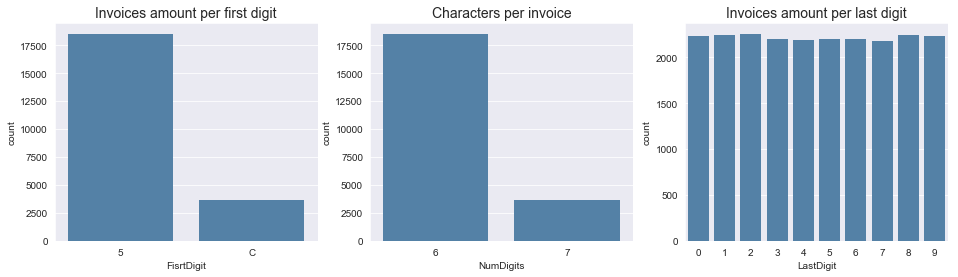

In [10]:
# DF with last digit count
last_digit = list_invoices.groupby(['LastDigit']).LastDigit.agg(['count']).reset_index()

# DF with fisrt digit count
first_digit = list_invoices.groupby(['FisrtDigit']).LastDigit.agg(['count']).reset_index()

# DF with number of digits count
num_digit = list_invoices.groupby(['NumDigits']).LastDigit.agg(['count']).reset_index()

# Make subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

# Make plots per first digit
ax1.set_title('Invoices amount per first digit', fontsize='14')
ax1 = sns.barplot(x="FisrtDigit", y="count", data=first_digit, color='steelblue', linewidth=0, ax=ax1)

# Make plots per Number of characters
ax2.set_title('Characters per invoice', fontsize='14')
ax2 = sns.barplot(x="NumDigits", y="count", data=num_digit, color='steelblue', linewidth=0, ax=ax2)

# Make plots per last digit
ax3.set_title('Invoices amount per last digit', fontsize='14')
ax3 = sns.barplot(x="LastDigit", y="count", data=last_digit, color='steelblue', linewidth=0, ax=ax3)

plt.show()


In [11]:
print('''Unique Invoices:''', UnicInvoiceNo)
print('''Invoices starts with "C":''', len(data.InvoiceNo[data.InvoiceNo.str.startswith('C')].unique()))
print('''Invoices starts with "C" and also have negative Quantity:''', len(data.InvoiceNo[(data.InvoiceNo.str.startswith('C')) & (data.Quantity < 0)].unique()))

Unique Invoices: 25900
Invoices starts with "C": 3836
Invoices starts with "C" and also have negative Quantity: 3836


<div style="background-color:#e9eff0; padding:15px; border: 2px solid #8db5a6;">

### _EDA of  InvoiceNo_

**Conclusion**: All invoices that starts with "C" are negatives invoices, and the invoices that contain 7 characters begin with "C"

**Action**: We will delete negative logs because we are analyze only invoices tha twere bought.

</div>

In [12]:
# Delete rows with negatives Quantity
data = data[~data.InvoiceNo.str.contains('C')]

---
### 2.b.b- Explore "Description"  field

In [13]:
products_f = data.groupby('Description').Description.agg(['count']).reset_index().sort_values(by='count', ascending=False)
sum(products_f.iloc[:100,1])

97728

Text(0, 0.5, 'Frequencies')

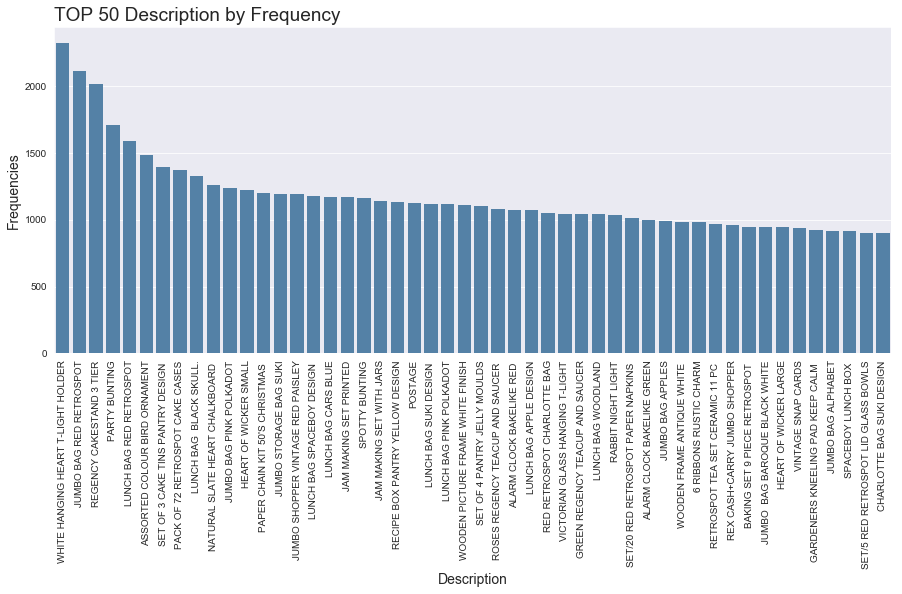

In [14]:
plt.figure(figsize=(15, 6))

ax1 = sns.barplot(x="Description", y="count", data=products_f[:50], color='steelblue', linewidth=0)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.title("TOP 50 Description by Frequency", loc="left", fontsize='19')
plt.xlabel("Description", fontsize='14')
plt.ylabel("Frequencies", fontsize='14')

In [15]:
# Set on Lowercase the name of Products
data['Description'] = data['Description'].str.lower()

In [16]:
unique_products = list(data.Description[data.Description.notnull()].unique())

bag_of_words = []
for x in unique_products:
    bag_of_words = bag_of_words + x.split()

wordsFiltered = []
for w in bag_of_words:
    if w.lower() not in stopWords:
        wordsFiltered.append(w)

df_words = pd.DataFrame(wordsFiltered)

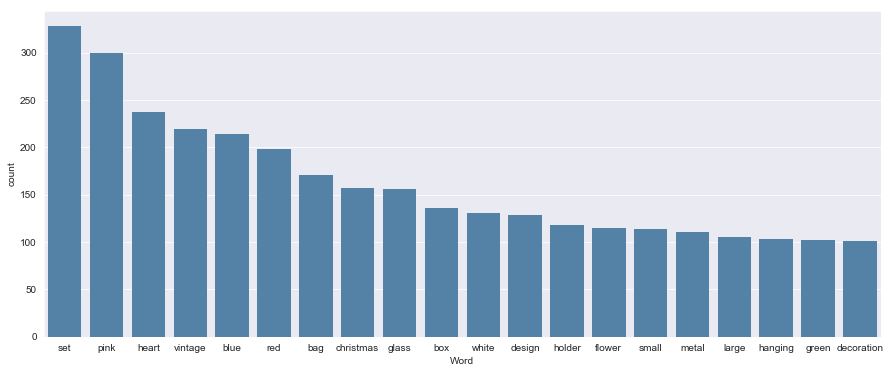

In [17]:
words_count = df_words[0].value_counts().reset_index()
words_count.columns = ['Word', 'count']

plt.figure(figsize=(15, 6))
sns.barplot(x="Word", y="count", data=words_count[words_count['count'] > 100], color='steelblue', linewidth=0)

In [18]:
# To be analyze = LDAvis

---
### 2.b.c- Explore "Quantity"  field

In [19]:
data[['Quantity', 'UnitPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,532621.0,10.239972,159.593551,-9600.00,1.00,3.00,10.00,80995.00
UnitPrice,532621.0,3.847621,41.758023,-11062.06,1.25,2.08,4.13,13541.33


In [20]:
# Make a DF with Quantity and frequency
quantitiy = data.Quantity.value_counts().reset_index()
quantitiy.columns = ['Quantity', 'count']

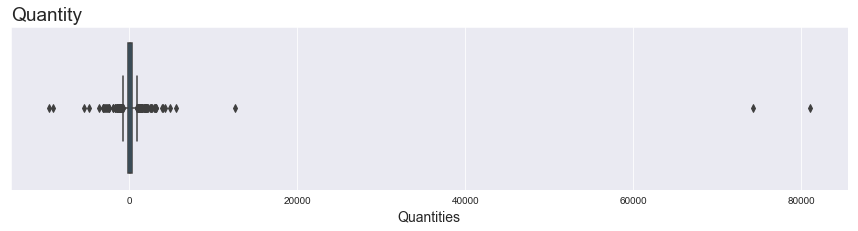

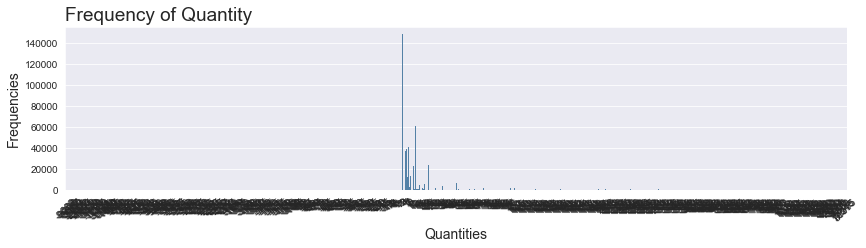

In [21]:
plt.figure(figsize=(15, 3))
sns.boxplot( x=quantitiy.Quantity)
plt.title("Quantity", loc="left", fontsize='19')
plt.xlabel("Quantities", fontsize='14')
plt.show()

plt.figure(figsize=(14, 3))
ax1 = sns.barplot(x="Quantity", y="count", data=quantitiy[(quantitiy['count'] > 0)], color='steelblue', linewidth=0)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.title("Frequency of Quantity", loc="left", fontsize='19')
plt.xlabel("Quantities", fontsize='14')
plt.ylabel("Frequencies", fontsize='14')
plt.show()

In [22]:
# Make DF where the amunt of 'Quantity' is greater than 0
quantity_Q = quantitiy[quantitiy.Quantity > 0].sort_values(by='Quantity')


df_morethan_25 = pd.DataFrame.from_dict({'Quantity': ['+25'], 'count': [sum(quantity_Q['count'][quantity_Q.Quantity > 25])]})
quantity_new = quantity_Q[quantity_Q.Quantity <= 25]
quantity_new['Quantity'] = quantity_new['Quantity'].apply(lambda x: str(x))

quantity_new = quantity_new.append(df_morethan_25)
quantity_new.reset_index(inplace=True, drop=True)

X = np.array(quantity_new.Quantity)
Y = np.array(quantity_new['count'])


C:\Users\Chorch\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


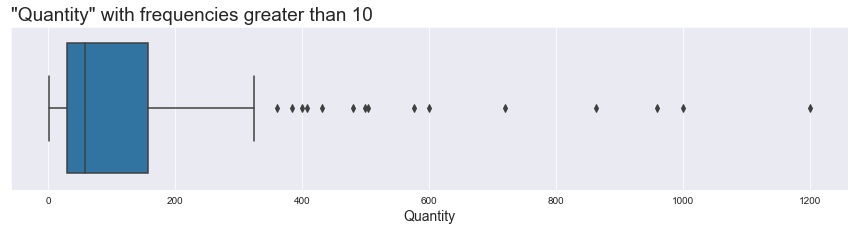

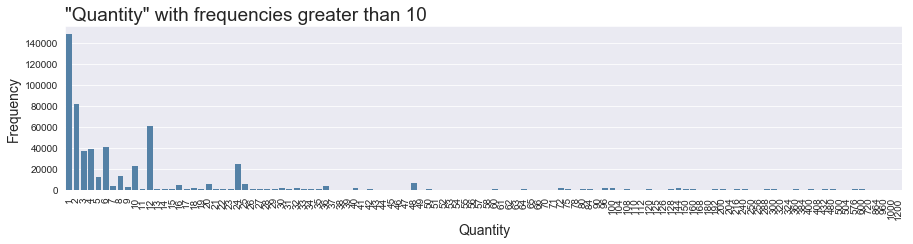

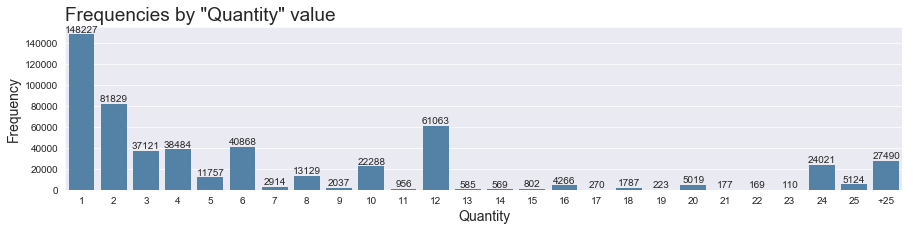

In [23]:


plt.figure(figsize=(15, 3))
sns.boxplot( x=quantity_Q.Quantity[(quantity_Q['count'] > 10)])
plt.title('''"Quantity" with frequencies greater than 10''', loc="left", fontsize='19')
plt.xlabel("Quantity", fontsize='14')
plt.show()



plt.figure(figsize=(15, 3))
ax1 = sns.barplot(x="Quantity", y="count", data=quantity_Q[(quantity_Q['count'] > 10)], color='steelblue', linewidth=0)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('''"Quantity" with frequencies greater than 10''', loc="left", fontsize='19')
plt.xlabel("Quantity", fontsize='14')
plt.ylabel("Frequency", fontsize='14')

plt.show()


plt.figure(figsize=(15, 3))
ax2 = sns.barplot(x="Quantity", y=Y, data=quantity_new, color='steelblue', linewidth=0, order=X)
plt.title('''Frequencies by "Quantity" value''', loc="left", fontsize='19')
plt.xlabel("Quantity", fontsize='14')
plt.ylabel("Frequency", fontsize='14')
for p, q in zip(ax2.patches, Y):
    ax2.text(p.get_x()+p.get_width()/2.,
        p.get_height()+2000,
        "{}".format(q),
        ha = 'center'  )
plt.show()

<div style="background-color:#e9eff0; padding:15px; border: 2px solid #8db5a6;">

### _EDA of  Quantity_

**Conclusion**: The Dataset contain "Quantity" values between -80.995 to 80.995. The negative values represent returned or failed purchases.

**Action**: We will delete negative values because we are analyze only invoices tha twere bought.

</div>

In [24]:
data = data[data.Quantity > 0]

---
### 2.b.d- Explore "InvoiceDate"  field

In [25]:
# Convertir InvoiceDate a formato fecha
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [26]:
# Crear variable InvoiceYear
data['InvoiceYear'] = data['InvoiceDate'].apply(lambda x: x.year)

# Create day of year
data['InvoiceDayYear'] = data['InvoiceDate'].apply(lambda x: x.timetuple().tm_yday)

# Create day of week
data['InvoiceDayWeek'] = data['InvoiceDate'].apply(lambda x: x.weekday())

# Crear variable InvoiceMonth
data['InvoiceMonth'] = data['InvoiceDate'].apply(lambda x: x.month)

# Crear variable InvoiceWeek
data['InvoiceWeekYear'] = data['InvoiceDate'].apply(lambda x: x.week)

# Crear variable InvoiceHour
data['InvoiceHour'] = data['InvoiceDate'].apply(lambda x: x.hour)

# Crear variable InvoiceTimestamp
data['InvoiceTimestamp'] = data['InvoiceDate'].apply(lambda x: round(datetime.timestamp(x)))

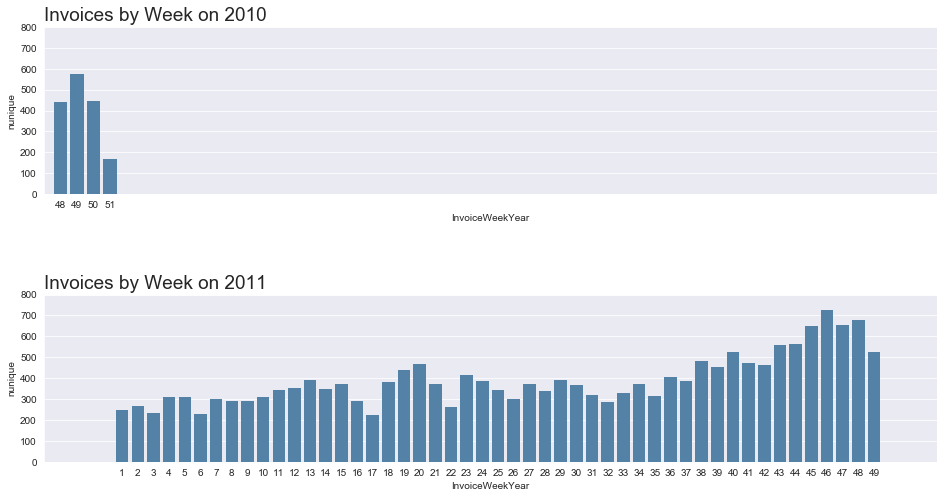

In [27]:
# Make DF with amount of Invoices per week
date_week = data.groupby(['InvoiceYear', 'InvoiceWeekYear']).InvoiceNo.agg(['nunique']).reset_index()

# Make subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
fig.subplots_adjust(hspace=.6)

# Make plots ax1
ax1.set_title('Invoices by Week on 2010', loc="left", fontsize='19')
ax1 = sns.barplot(x="InvoiceWeekYear", y="nunique", data=date_week[date_week.InvoiceYear == 2010], 
                  color='steelblue', linewidth=0, ax=ax1)
ax1.set(xlim=(-1, 53))
ax1.set(ylim=(0, 800))

# Make plots ax2
ax2.set_title('Invoices by Week on 2011', loc="left", fontsize='19')
ax2 = sns.barplot(x="InvoiceWeekYear", y="nunique", data=date_week[date_week.InvoiceYear == 2011], 
                  color='steelblue', linewidth=0, ax=ax2)
ax2.set(xlim=(-5, 52))
ax2.set(ylim=(0, 800))

plt.show()

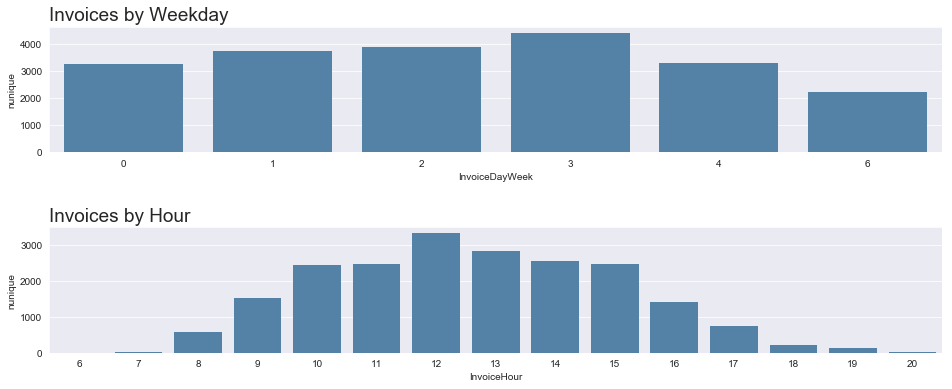

In [28]:
date_weekday = data.groupby(['InvoiceDayWeek']).InvoiceNo.agg(['nunique']).reset_index()

date_hour = data.groupby(['InvoiceHour']).InvoiceNo.agg(['nunique']).reset_index()


# Make subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6))
fig.subplots_adjust(hspace=.6)


# Make plots per first digit
ax1.set_title('Invoices by Weekday', loc="left", fontsize='19')
ax1 = sns.barplot(x="InvoiceDayWeek", y="nunique", data=date_weekday, 
                  color='steelblue', linewidth=0, ax=ax1)

# Make plots per Number of characters
ax2.set_title('Invoices by Hour', loc="left", fontsize='19')
ax2 = sns.barplot(x="InvoiceHour", y="nunique", data=date_hour, 
                  color='steelblue', linewidth=0, ax=ax2)

plt.show()

<div style="background-color:#e9eff0; padding:15px; border: 2px solid #8db5a6;">
    
### _EDA of  InvoiceDate_

**Conclusion**: The Dataset contain the last month of 2010 and all months of 2011.

**Comments**: We have no sales on Saturdays (can be an error or not)

</div>

---
### 2.b.e- Explore "CustomerID"  field

In [29]:
# Make DataFrame with uniques CustomerID
list_CustomerID = data.groupby(['CustomerID']).CustomerID.agg(['count']).reset_index()
list_CustomerID['CustomerID'] = list_CustomerID.CustomerID.astype('int64')

# Create column with the first digit of invoices
list_CustomerID['FisrtDigit'] = list_CustomerID['CustomerID'].apply(lambda x: str(x)[:1])

# Create column with the last digit of invoices
list_CustomerID['LastDigit'] = list_CustomerID['CustomerID'].apply(lambda x: str(x)[-1:])

# Create column with the first digit of invoices
list_CustomerID['NumDigits'] = list_CustomerID['CustomerID'].apply(lambda x: len(str(x)))

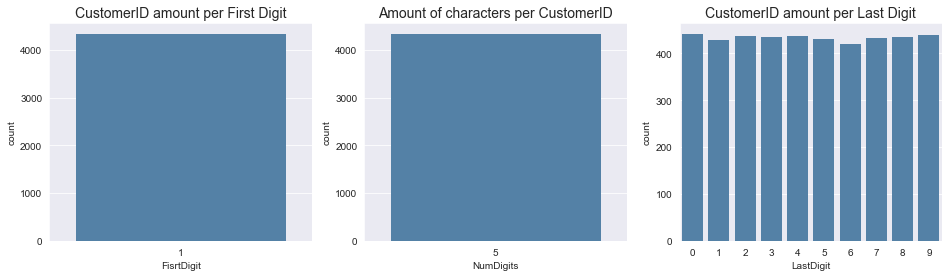

In [30]:
# DF with last digit count
last_digit = list_CustomerID.groupby(['LastDigit']).LastDigit.agg(['count']).reset_index()

# DF with fisrt digit count
first_digit = list_CustomerID.groupby(['FisrtDigit']).LastDigit.agg(['count']).reset_index()

# DF with number of digits count
num_digit = list_CustomerID.groupby(['NumDigits']).LastDigit.agg(['count']).reset_index()

# Make subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

# Make plots ax1
ax1.set_title('CustomerID amount per First Digit', fontsize='14')
ax1 = sns.barplot(x="FisrtDigit", y="count", data=first_digit, color='steelblue', linewidth=0, ax=ax1)

# Make plots ax2
ax2.set_title('Amount of characters per CustomerID', fontsize='14')
ax2 = sns.barplot(x="NumDigits", y="count", data=num_digit, color='steelblue', linewidth=0, ax=ax2)

# Make plots ax3
ax3.set_title('CustomerID amount per Last Digit', fontsize='14')
ax3 = sns.barplot(x="LastDigit", y="count", data=last_digit, color='steelblue', linewidth=0, ax=ax3)

plt.show()

In [31]:
# Visualizar registros con CustomerID nulos
nan_customers = data[(data.CustomerID.isnull())]
print('Logs where CustomerID is Nan:', len(nan_customers))
print('Logs where CustomerID is Nan, with negative Quantity value:',len(nan_customers[nan_customers.Quantity <0]))
print('Logs where CustomerID is Nan, with positive Quantity value:',len(nan_customers[nan_customers.Quantity >0]))

Logs where CustomerID is Nan: 133361
Logs where CustomerID is Nan, with negative Quantity value: 0
Logs where CustomerID is Nan, with positive Quantity value: 133361


<div style="background-color:#e9eff0; padding:15px; border: 2px solid #8db5a6;">
    
### _EDA of  CustomerID_


**Conclusion**: The Dataset contain 134.697 cutomers with Nan values

**Action**: We will delete thouse customers, because we are going to work on CustomersID's

</div>

In [32]:
data = data[data.CustomerID.notnull()]

---
### 2.b.f- Explore "Country" field

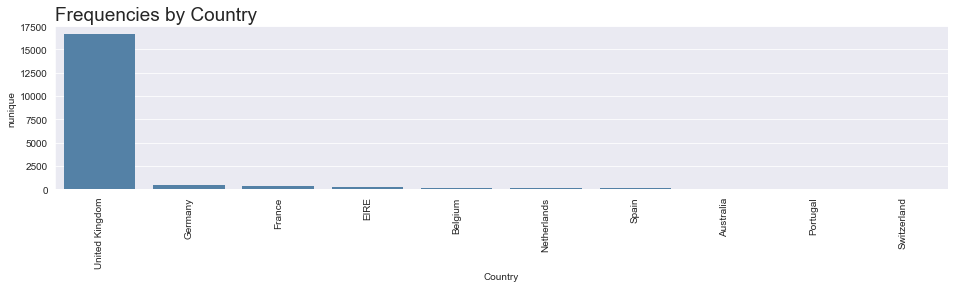

In [33]:
countries = data.groupby('Country').InvoiceNo.agg(['nunique']).reset_index().sort_values(by='nunique', ascending=False)


# Make plots 
plt.figure(figsize=(16, 3))
ax1 = sns.barplot(x="Country", y="nunique", data=countries[:10], 
                  color='steelblue', linewidth=0)
ax1.set_title('', loc="left", fontsize='19')
ax1.set_title('Frequencies by Country', loc="left", fontsize='19')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.show()

---
<div style="background-color:#e9eff0; padding:15px; border: 2px solid #8db5a6;">


### _EDA Conclusion_

- **Datos Negativos**: Representan devoluciones de productos y/o facturas y se mantendrán.
- **CustomerID nullos**: Se eliminarán, ya que **_se trabajará en base a clientes_**.

</div>

---
## 3- Preprocessing (Nulls & Formats)

In [34]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
InvoiceYear         0
InvoiceDayYear      0
InvoiceDayWeek      0
InvoiceMonth        0
InvoiceWeekYear     0
InvoiceHour         0
InvoiceTimestamp    0
dtype: int64

---
# 3- Feature Engineering

---
## 3-a Campo TotalPrice

New column with the total price of each product **(UnitPrice * Quantity)**

In [144]:
# Crear TotalPrice UnitPrice * Quantity
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']

In [186]:
u = pd.cut(data['TotalPrice'], [0, 10, 20, 30, 50, 100, 1000, 1000000])
u.value_counts()

(0, 10]            175892
(10, 20]           136313
(20, 30]            36891
(30, 50]            21860
(50, 100]           15271
(100, 1000]         11342
(1000, 1000000]       315
Name: TotalPrice, dtype: int64

---
### First_Invoice

Create a new flag column that describe if one invoice is the fisrt purchase or not
- 0 = False
- 1 = True

In [36]:
# Make DF with CustomerID + InvoiceNo
customer_invoices = data.groupby(['CustomerID', 'InvoiceNo']).InvoiceNo.agg(['nunique']).reset_index()

# Unique Customer List
customers_list = list(customer_invoices.CustomerID.unique())

# List of first InvoiceNo
first_invoices = []

# Loop to get the first invoice by each CustomerID
for x in customers_list:
    first_invoices.append(customer_invoices.InvoiceNo[customer_invoices.CustomerID == x].min())

In [37]:
# Create a Flag Column
data['FirstInvoice'] = 0

# Insert 1 to invoices collected on "first_invoices" list
data['FirstInvoice'][data['InvoiceNo'].isin(first_invoices)] = 1

C:\Users\Chorch\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# Plot correlation matrix

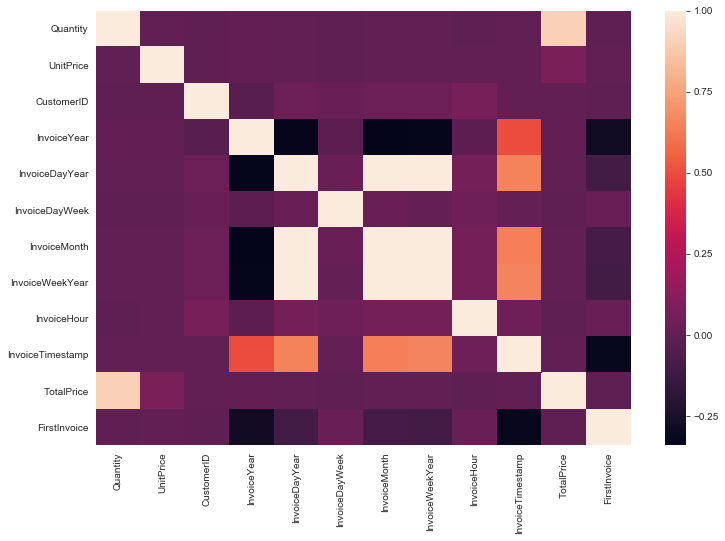

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())

In [188]:
# sort columns of master DF
data = data [['CustomerID', 'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'Quantity', 'UnitPrice', 'TotalPrice',
            'FirstInvoice', 'InvoiceYear', 'InvoiceWeekYear', 'InvoiceDayYear', 'InvoiceDayWeek', 'InvoiceHour', 'InvoiceTimestamp']]


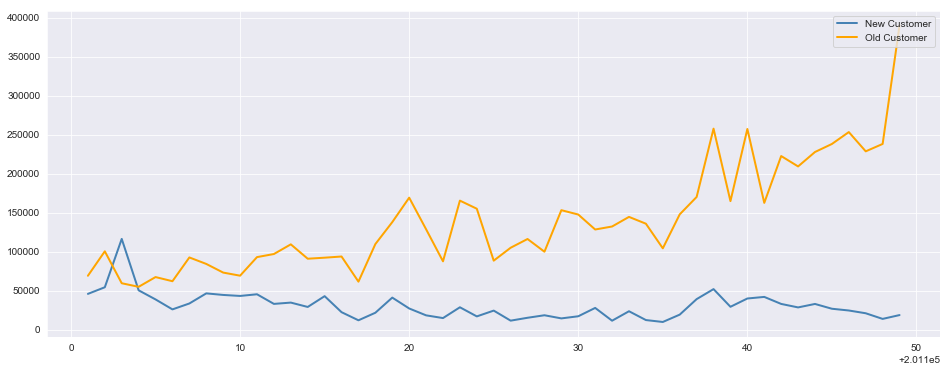

In [189]:
data['InvoiceYearDAY'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.week)

insights = pd.pivot_table(data, index=['InvoiceYear','InvoiceYearDAY','FirstInvoice'], 
                          values=['TotalPrice'], aggfunc={'TotalPrice': np.sum}).reset_index()

plt.figure(figsize=(16, 6))
plt.plot('InvoiceYearDAY', 'TotalPrice', label='New Customer', 
         data=insights[(insights.InvoiceYear == 2011)&(insights.FirstInvoice == 1)], color='steelblue', linewidth=2)
plt.plot('InvoiceYearDAY', 'TotalPrice', label='Old Customer', 
         data=insights[(insights.InvoiceYear == 2011)&(insights.FirstInvoice == 0)], color='orange', linewidth=2)

plt.legend(loc='upper right')
plt.show()

data = data.drop('InvoiceYearDAY', 1)

In [190]:
# Visualizar el Dataset
data.head()

,CustomerID,Country,InvoiceNo,InvoiceDate,Description,Quantity,UnitPrice,TotalPrice,FirstInvoice,InvoiceYear,InvoiceWeekYear,InvoiceDayYear,InvoiceDayWeek,InvoiceHour,InvoiceTimestamp
0,17850.0,United Kingdom,536365,2010-12-01 08:26:00,white hanging heart t-light holder,6,2.55,15.30,1,2010,48,335,2,8,1291188360
1,17850.0,United Kingdom,536365,2010-12-01 08:26:00,white metal lantern,6,3.39,20.34,1,2010,48,335,2,8,1291188360
2,17850.0,United Kingdom,536365,2010-12-01 08:26:00,cream cupid hearts coat hanger,8,2.75,22.00,1,2010,48,335,2,8,1291188360
3,17850.0,United Kingdom,536365,2010-12-01 08:26:00,knitted union flag hot water bottle,6,3.39,20.34,1,2010,48,335,2,8,1291188360
4,17850.0,United Kingdom,536365,2010-12-01 08:26:00,red woolly hottie white heart.,6,3.39,20.34,1,2010,48,335,2,8,1291188360
